# Read and store the data set

In [39]:
from ucimlrepo import fetch_ucirepo 
# scientific computing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [40]:
# import customized module where there are new functions
import DataStats
importlib.reload(DataStats) 

<module 'DataStats' from '/Users/janeyan/Desktop/Machine Learning/Project/5420_Final_Project/src/DataStats.py'>

In [41]:
# fetch dataset from UCI repository
# support2 = fetch_ucirepo(id=880) 
  
# # data (as pandas dataframes) 
# data = support2.data['original']

# data.info()

In [42]:
# fetch dataset from local directory
data = pd.read_csv('../data/original_data.csv').drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [43]:
# Data types and missing values
print("\nData types and missing values:")
missing_values = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100
dtype_info = data.dtypes
missing_info = pd.DataFrame({'Data Type': dtype_info, 
                            'Missing Values': missing_values,
                            'Missing Percentage': missing_percent})
print(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Percentage', ascending=False))


Data types and missing values:
        Data Type  Missing Values  Missing Percentage
adlp      float64            5641           61.954970
urine     float64            4862           53.399231
glucose   float64            4500           49.423394
bun       float64            4352           47.797913
totmcst   float64            3475           38.165843
alb       float64            3372           37.034596
income     object            2982           32.751236
adls      float64            2867           31.488193
bili      float64            2601           28.566722
pafi      float64            2325           25.535420
ph        float64            2284           25.085118
prg2m     float64            1649           18.110928
edu       float64            1634           17.946183
prg6m     float64            1633           17.935200
sfdm2      object            1400           15.376167
totcst    float64             888            9.752883
wblc      float64             212            2.328

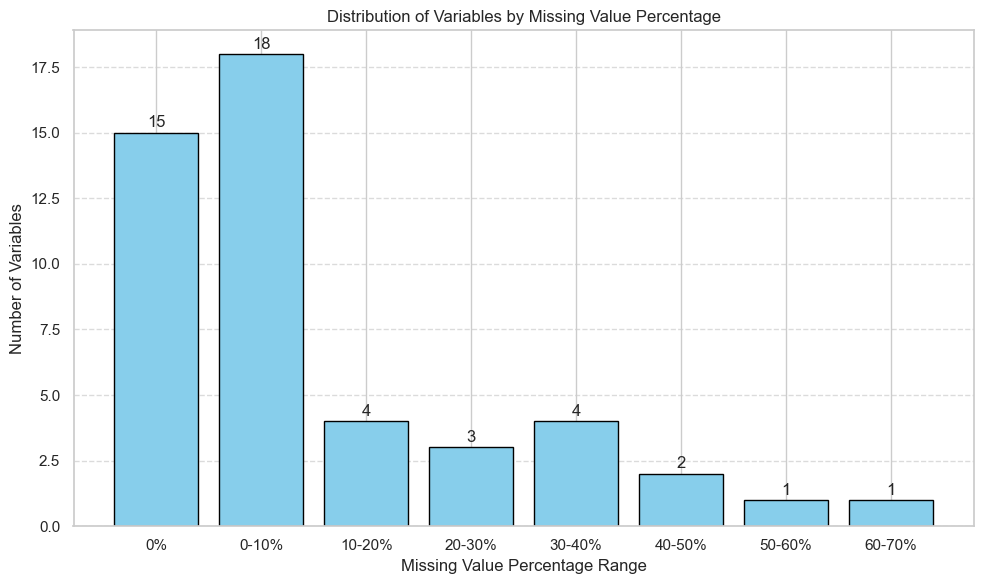

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Variables with missing values
variables_with_missing = ['adlp', 'urine', 'glucose', 'bun', 'totmcst', 'alb', 'income', 'adls', 
                         'bili', 'pafi', 'ph', 'prg2m', 'edu', 'prg6m', 'sfdm2', 'totcst', 
                         'wblc', 'charges', 'avtisst', 'crea', 'race', 'dnr', 'dnrday', 'aps', 
                         'surv2m', 'sod', 'sps', 'surv6m', 'temp', 'resp', 'hrt', 'scoma', 'meanbp']

missing_percentages = [61.95, 53.40, 49.42, 47.80, 38.17, 37.03, 32.75, 31.49, 
                      28.57, 25.54, 25.09, 18.11, 17.95, 17.94, 15.38, 9.75, 
                      2.33, 1.89, 0.90, 0.74, 0.46, 0.33, 0.33, 0.01, 0.01, 
                      0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

# Create a DataFrame to work with
missing_data = pd.DataFrame({
    'variable': variables_with_missing,
    'missing_percentage': missing_percentages
})

# Create the categories manually
categories = ['0%', '0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%']
counts = [15, 18, 4, 3, 4, 2, 1, 1]  # Manually set the counts based on your data

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Variables by Missing Value Percentage')
plt.xlabel('Missing Value Percentage Range')
plt.ylabel('Number of Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()


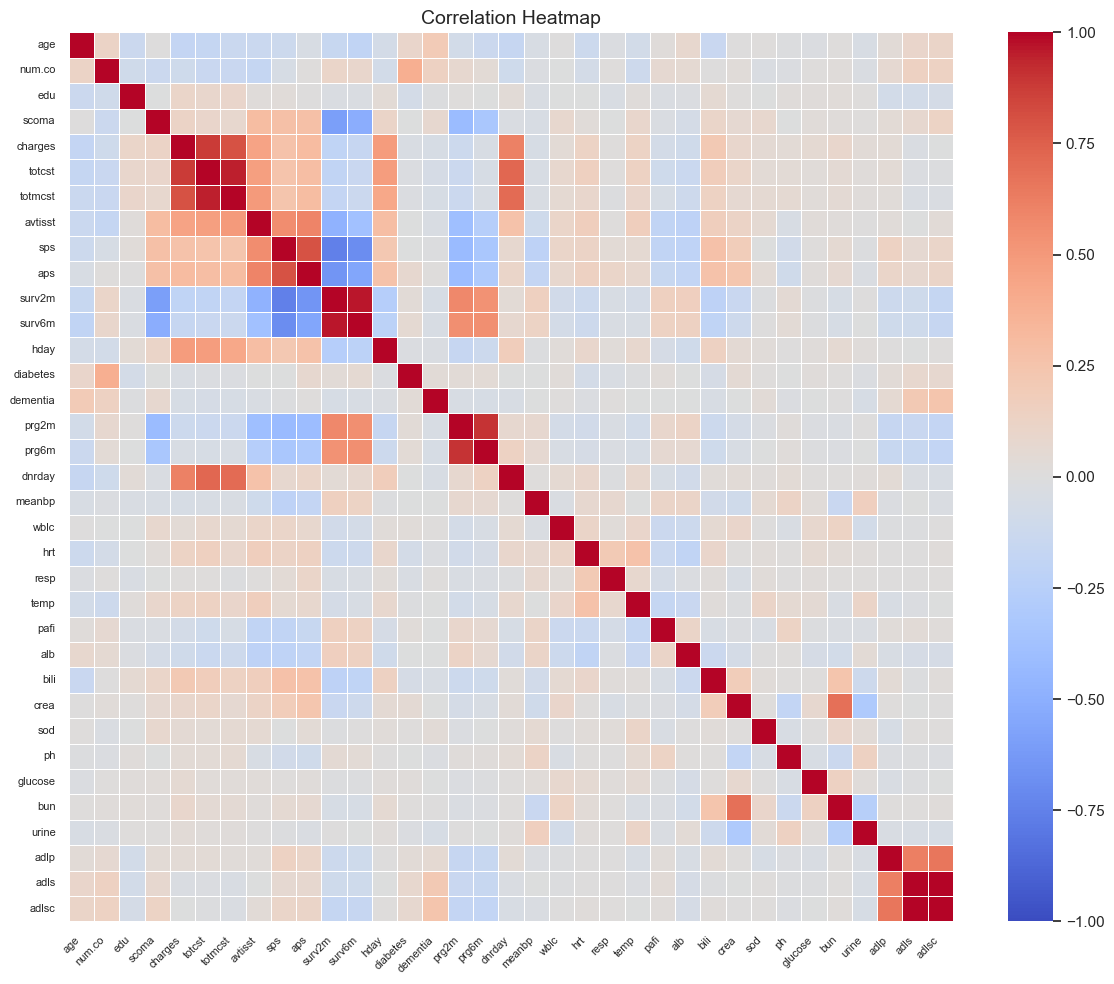

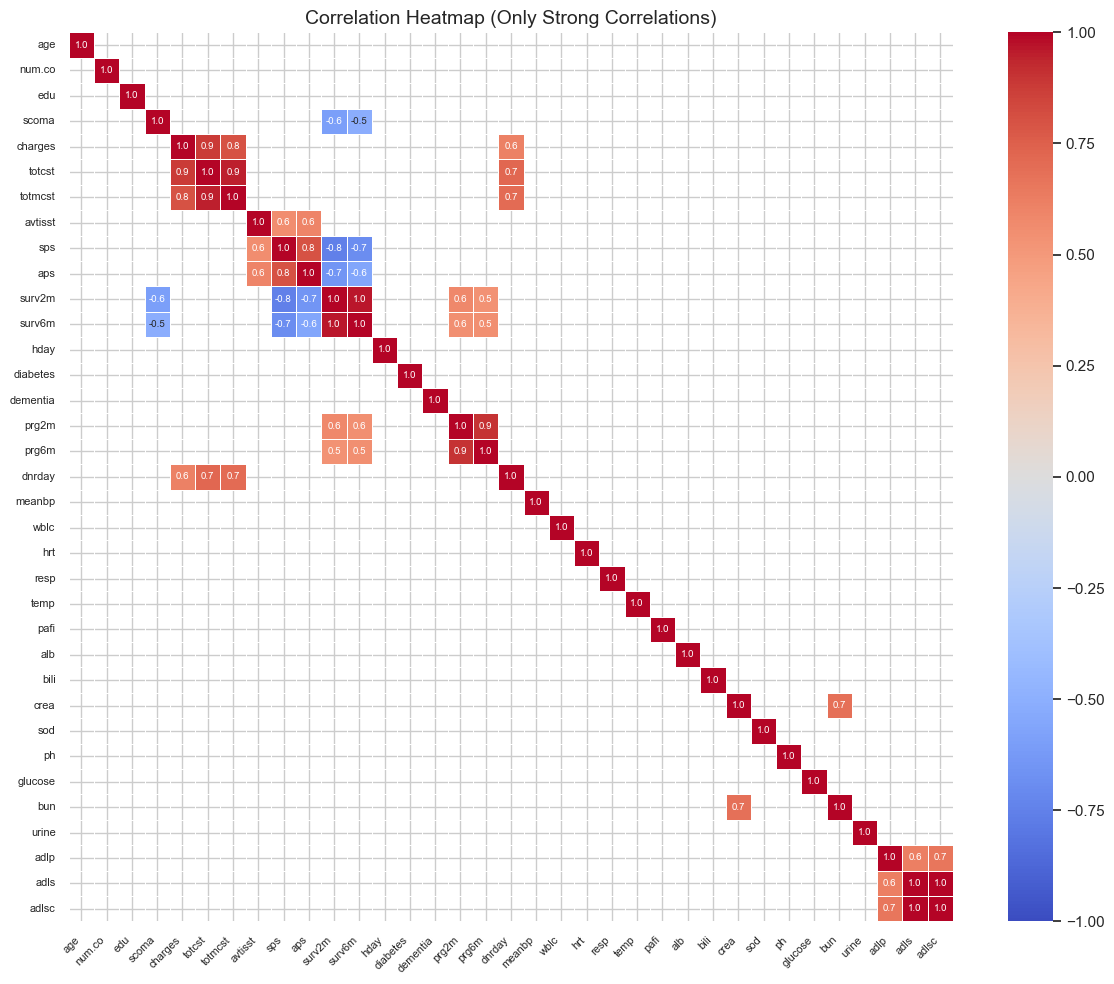

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data' is your DataFrame with numerical columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Create a figure
plt.figure(figsize=(12, 10))

# Create the heatmap without annotation numbers
sns.heatmap(correlation_matrix, 
            annot=False,          # Remove correlation values
            cmap='coolwarm',      # Color scheme
            linewidths=0.5,       # Width of grid lines
            vmin=-1, vmax=1)      # Range of correlation values

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)  # Smaller y-axis labels
plt.tight_layout()
plt.show()
# Alternative: Show numbers only for strong correlations
plt.figure(figsize=(12, 10))

# Create mask for significant correlations
mask = np.abs(correlation_matrix) < 0.5  # Only show correlations > |0.5|

# Create the heatmap with selective annotation
sns.heatmap(correlation_matrix,
            annot=True,           # Show values
            mask=mask,            # Apply mask to hide weak correlations
            fmt='.1f',            # Format with only 1 decimal place
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"size": 7},  # Smaller font for annotations
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap (Only Strong Correlations)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [45]:
DataStats.numerical_correlation(data)

/Users/janeyan/Desktop/Machine Learning/Project/5420_Final_Project/src/DataStats.py:91: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return raw_corr_matrix.style.applymap(


,id,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
id,1.000000,0.037366,-0.045849,-0.071871,-0.022347,-0.053008,0.088782,-0.250794,-0.005346,-0.242265,-0.152670,-0.167094,-0.030589,-0.079378,-0.060142,0.051146,0.045769,-0.039508,0.048950,-0.016523,0.011055,0.024512,-0.036303,0.123582,0.032289,-0.016056,0.023704,-0.092149,-0.013898,0.039315,-0.163640,-0.051702,-0.045403,-0.020055,-0.053758,-0.115053,-0.003499,-0.002090,-0.001007,-0.050149
age,0.037366,1.000000,0.179230,0.039354,-0.085518,-0.134531,0.127986,-0.135537,0.006557,-0.167864,-0.155399,-0.134466,-0.133693,-0.115444,-0.032576,-0.158056,-0.197112,-0.071923,0.095958,0.195303,-0.084631,-0.131794,-0.156809,-0.040134,0.004311,-0.126307,-0.021644,-0.085966,0.017296,0.082836,-0.132711,0.001910,0.013980,-0.020398,-0.009136,0.023265,-0.045094,0.043799,0.096926,0.115379
death,-0.045849,0.179230,1.000000,0.404793,-0.083098,-0.710489,0.068634,-0.002943,0.135986,-0.014402,-0.022615,-0.020465,0.117293,0.156346,0.156866,-0.325049,-0.378247,0.063845,0.011940,0.044391,-0.306923,-0.383796,-0.146655,-0.031753,-0.004825,-0.003841,0.006331,-0.029459,0.002258,0.014215,0.029658,0.026705,-0.018409,-0.008592,0.002928,0.019307,-0.004537,0.107614,0.146124,0.154760
hospdead,-0.071871,0.039354,0.404793,1.000000,-0.010579,-0.486616,-0.077746,0.015941,0.379582,0.187214,0.191738,0.176864,0.552508,0.462578,0.475855,-0.558111,-0.498079,0.213804,-0.013186,0.025831,-0.503983,-0.430151,-0.055778,-0.087594,0.069621,0.095483,0.020777,0.069972,-0.103693,-0.143165,0.167734,0.098724,0.029903,-0.038199,0.012128,0.036711,-0.016647,0.099518,0.090047,0.126350
slos,-0.022347,-0.085518,-0.083098,-0.010579,1.000000,0.096903,-0.110978,0.031547,0.037513,0.641403,0.772046,0.768692,0.293640,0.113168,0.150851,-0.047855,-0.016808,0.204155,0.006075,-0.010820,-0.037096,0.021267,0.882923,0.006807,0.066488,0.091680,-0.000180,0.102539,-0.057788,-0.101903,0.027496,0.044876,0.033885,0.034540,0.008136,0.012597,0.023694,0.105861,0.029700,0.019143
d.time,-0.053008,-0.134531,-0.710489,-0.486616,0.096903,1.000000,-0.045936,-0.005906,-0.203660,-0.035696,-0.010532,-0.052847,-0.225478,-0.231486,-0.219636,0.392719,0.429069,-0.089718,-0.008120,-0.054488,0.387729,0.428419,0.158174,0.057194,-0.039042,-0.039514,-0.002243,0.008446,0.057910,0.064473,-0.072876,-0.046206,0.000313,0.022283,-0.002414,-0.019703,0.018035,-0.087903,-0.123983,-0.136521
num.co,0.088782,0.127986,0.068634,-0.077746,-0.110978,-0.045936,1.000000,-0.109775,-0.126215,-0.108838,-0.147501,-0.144888,-0.164272,-0.048492,0.016470,0.099580,0.086865,-0.080627,0.387569,0.139526,0.063745,0.030098,-0.116699,-0.016713,-0.010753,-0.067751,0.011633,-0.113781,0.074331,0.056395,0.000581,0.033319,-0.025437,-0.020673,0.007348,0.030550,-0.033966,0.077699,0.142791,0.142836
edu,-0.250794,-0.135537,-0.002943,0.015941,0.031547,-0.005906,-0.109775,1.000000,-0.000482,0.112803,0.090229,0.099033,0.024131,0.025665,0.001937,-0.023780,-0.030920,0.040076,-0.075112,-0.013413,0.013826,-0.000537,0.036512,-0.033463,-0.007368,-0.003417,-0.025647,0.028365,-0.028560,-0.024726,0.057199,0.008913,-0.005265,0.022757,0.011323,0.026304,0.015514,-0.088278,-0.081200,-0.067644
scoma,-0.005346,0.006557,0.135986,0.379582,0.037513,-0.203660,-0.126215,-0.000482,1.000000,0.137029,0.116443,0.096084,0.313402,0.278437,0.279056,-0.590313,-0.499572,0.116485,-0.001114,0.072192,-0.404672,-0.318010,-0.006522,-0.037110,0.079583,0.026471,-0.000831,0.098150,-0.028703,-0.065460,0.107912,0.068842,0.081112,-0.002444,0.027356,0.021288,0.005098,0.042039,0.074462,0.126339
charges,-0.242265,-0.167864,-0.014402,0.187214,0.641403,-0.035696,-0.108838,0.112803,0.137029,1.000000,0.871896,0.814307,0.449707,0.264415,0.311941,-0.210029,-0.162642,0.476965,-0.023669,-0.045827,-0.131908,-0.050267,0.620366,-0.046848,0.042278,0.129735,0.016292,0.127782,-0.081390,-0.099543,0.2161

# EDA

Check the distribution of these numerical variables.

In [46]:
descriptive_stats = DataStats.distribution_stats(data)

There is at least one variable that is highly skewed
There is at least one variable that has more outliers
There is no vairable that is normally distributed


/Users/janeyan/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9105.
  res = hypotest_fun_out(*samples, **kwds)
/Users/janeyan/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7471.
  res = hypotest_fun_out(*samples, **kwds)
/Users/janeyan/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9104.
  res = hypotest_fun_out(*samples, **kwds)
/Users/janeyan/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8933.
  res = hypotest_fun_ou

    1.Skewness:
    
    •	If skewness is close to 0, the distribution is approximately symmetric (a property of a normal distribution).
	•	Large positive skewness (>1) means the distribution has a long right tail.
	•	Large negative skewness (<-1) means the distribution has a long left tail.

    2.	Kurtosis:

	•	Measures whether the distribution has heavier or lighter tails compared to a normal distribution.
	•	Kurtosis > 3 → Heavy tails (leptokurtic, more outliers).
	•	Kurtosis < 3 → Light tails (platykurtic, fewer outliers).
	•	Kurtosis = 3 → Normal distribution.

	3.	Shapiro-Wilk Test:
	•	Tests whether the data is normally distributed.
	•	Returns a p-value:
	•	p > 0.05 → Data is likely normal.
	•	p ≤ 0.05 → Data is not normal.

In [47]:
descriptive_stats

,id,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9.105000e+03,9.105000e+03,9.105000e+03,9.105000e+03,9.105000e+03,9.105000e+03,9.105000e+03,7.471000e+03,9.104000e+03,8.933000e+03,...,6.504000e+03,9.038000e+03,9.104000e+03,6.821000e+03,4.605000e+03,4.753000e+03,4.243000e+03,3.464000e+03,6.238000e+03,9.105000e+03
mean,4.553000e+03,6.265082e+01,6.810544e-01,2.591982e-01,1.786304e+01,4.784499e+02,1.868644e+00,1.174769e+01,1.205855e+01,5.999579e+04,...,2.554463e+00,1.770961e+00,1.375685e+02,7.415364e+00,1.598734e+02,3.234946e+01,2.191546e+03,1.157910e+00,1.637384e+00,1.888272e+00
std,2.628531e+03,1.559371e+01,4.660935e-01,4.382187e-01,2.200644e+01,5.603833e+02,1.344409e+00,3.447743e+00,2.463669e+01,1.026488e+05,...,5.318448e+00,1.686041e+00,6.029326e+00,8.056350e-02,8.839154e+01,2.679229e+01,1.455246e+03,1.739672e+00,2.231358e+00,2.003763e+00
min,1.000000e+00,1.804199e+01,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.169000e+03,...,9.999084e-02,9.999084e-02,1.100000e+02,6.829102e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.277000e+03,5.279700e+01,0.000000e+00,0.000000e+00,6.000000e+00,2.600000e+01,1.000000e+00,1.000000e+01,0.000000e+00,9.740000e+03,...,5.000000e-01,8.999023e-01,1.340000e+02,7.379883e+00,1.030000e+02,1.400000e+01,1.165500e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.553000e+03,6.485699e+01,1.000000e+00,0.000000e+00,1.100000e+01,2.330000e+02,2.000000e+00,1.200000e+01,0.000000e+00,2.502400e+04,...,8.999023e-01,1.199951e+00,1.370000e+02,7.419922e+00,1.350000e+02,2.300000e+01,1.968000e+03,0.000000e+00,1.000000e+00,1.000000e+00
75%,6.829000e+03,7.399896e+01,1.000000e+00,1.000000e+00,2.000000e+01,7.610000e+02,3.000000e+00,1.400000e+01,9.000000e+00,6.459800e+04,...,1.899902e+00,1.899902e+00,1.410000e+02,7.469727e+00,1.880000e+02,4.200000e+01,3.000000e+03,2.000000e+00,3.000000e+00,3.000000e+00
max,9.105000e+03,1.018480e+02,1.000000e+00,1.000000e+00,3.430000e+02,2.029000e+03,9.000000e+00,3.100000e+01,1.000000e+02,1.435423e+06,...,6.300000e+01,2.150000e+01,1.810000e+02,7.769531e+00,1.092000e+03,3.000000e+02,9.000000e+03,7.000000e+00,7.000000e+00,7.073242e+00
skewness,0.000000e+00,-5.021164e-01,-7.770721e-01,1.099244e+00,4.624615e+00,1.199262e+00,8.232940e-01,-5.826728e-02,2.333585e+00,4.687144e+00,...,4.817305e+00,3.225092e+00,3.573931e-01,-1.028938e+00,2.577963e+00,1.880382e+00,9.720198e-01,1.693219e+00,1.201637e+00,9.377152e-01
kurtosis,-1.200000e+00,-1.659246e-01,-1.396358e+00,-7.920603e-01,3.507935e+01,3.583161e-01,6.436066e-01,1.495601e+00,4.845473e+00,3.212548e+01,...,2.864789e+01,1.429758e+01,1.602005e+00,3.335120e+00,1.272204e+01,5.240971e+00,1.316135e+00,2.015955e+00,4.276701e-02,-6.666686e-02


Drop rows where sfdm2 is NA

In [48]:
# Drop rows where sfdm2 is NA
data_clean = data.dropna(subset=['sfdm2'])
data_clean = data_clean.drop(columns=['death', 'hospdead', 'd.time', 'id','slos'], errors='ignore')

# Check the new shape
print(f"Shape after dropping rows with missing sfdm2: {data_clean.shape}")

# Continue with the cleaned dataset
data = data_clean

Shape after dropping rows with missing sfdm2: (7705, 43)


visualize sfdm2 distributions.


sfdm2 Distribution:
sfdm2
<2 mo. follow-up       3123
no(M2 and SIP pres)    3061
adl>=4 (>=5 if sur)     916
SIP>=30                 564
Coma or Intub            41
Name: count, dtype: int64

Percentages:
sfdm2
<2 mo. follow-up       40.532122
no(M2 and SIP pres)    39.727450
adl>=4 (>=5 if sur)    11.888384
SIP>=30                 7.319922
Coma or Intub           0.532122
Name: proportion, dtype: float64


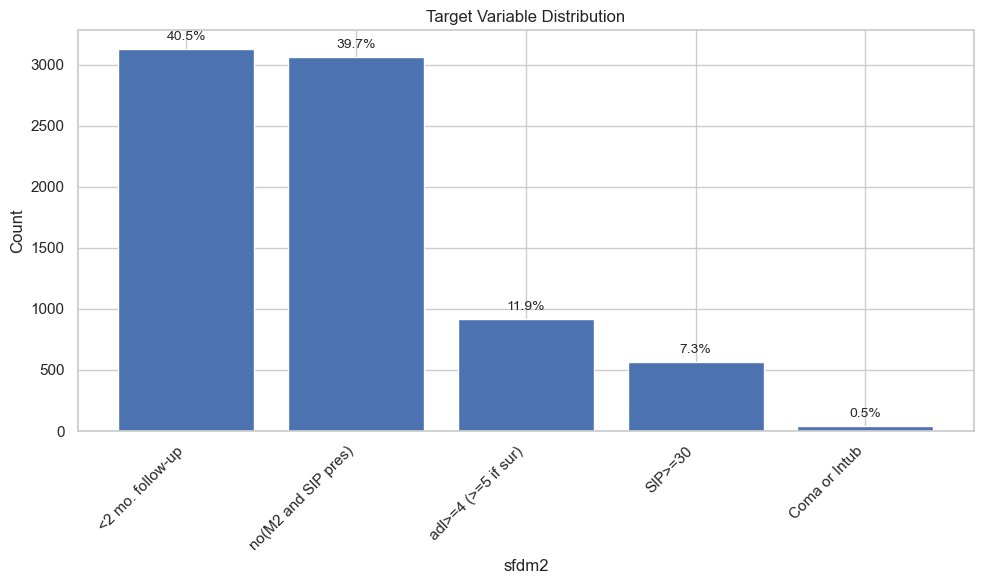

In [50]:
#Analysis of target variable-sfdm2
sfdm2_counts = data['sfdm2'].value_counts()
print("\nsfdm2 Distribution:")
print(sfdm2_counts)
sfdm2_percentages = data['sfdm2'].value_counts(normalize=True) * 100
print("\nPercentages:")
print(sfdm2_percentages)

plt.figure(figsize=(10, 6))
bars = plt.bar(sfdm2_counts.index, sfdm2_counts.values)
plt.title('Target Variable Distribution')
plt.xlabel('sfdm2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = sfdm2_percentages.iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Custom imputation with recommended clinical values
# Insert this after simple_encoding_maping() and before creating imputers

# Dictionary of recommended values for specific clinical variables
recommended_values = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9.0,
    'urine': 2502
}

# Make a copy of the data to avoid modifying the original
data_with_recommended = data.copy()

# Fill missing values with recommended clinical values
for var, value in recommended_values.items():
    # Check if the column exists and has missing values
    if var in data_with_recommended.columns and data_with_recommended[var].isna().sum() > 0:
        missing_count = data_with_recommended[var].isna().sum()
        data_with_recommended[var] = data_with_recommended[var].fillna(value)
        print(f"Imputed {missing_count} missing values in '{var}' with {value}")

# Check the missing values after imputation
print("\nMissing values after clinical imputation:")
missing_after = data_with_recommended.isna().sum()
print(missing_after[missing_after > 0].sort_values(ascending=False))

# Replace the original data with the imputed version
data = data_with_recommended

# Now proceed with the remaining imputation pipelines for other variables

Imputed 2779 missing values in 'alb' with 3.5
Imputed 1888 missing values in 'pafi' with 333.3
Imputed 2150 missing values in 'bili' with 1.01
Imputed 50 missing values in 'crea' with 1.01
Imputed 3647 missing values in 'bun' with 6.51
Imputed 171 missing values in 'wblc' with 9.0
Imputed 4087 missing values in 'urine' with 2502

Missing values after clinical imputation:
adlp       4683
glucose    3747
totmcst    2898
income     2211
adls       2023
ph         1852
prg2m      1330
prg6m      1317
edu        1045
totcst      763
charges     141
avtisst      67
dnr          30
dnrday       30
race         29
surv6m        1
sps           1
hrt           1
resp          1
temp          1
sod           1
surv2m        1
aps           1
scoma         1
meanbp        1
dtype: int64


# Create train and test data sets

In [ ]:
import importlib
# read the module again to see the changes
importlib.reload(DataStats)

<module 'DataStats' from '/Users/janeyan/Desktop/Machine Learning/Project/5420_Final_Project/src/DataStats.py'>

In [ ]:
# choose 80% of the data for training and 20% for testing
# DataStats.split_train_test(data, frac = 0.8)
from sklearn.model_selection import train_test_split

# Create x and y
x = data.drop('sfdm2', axis=1)
y = data['sfdm2']

# Perform stratified split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Combine X and y back for train and test sets
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

# Verify the shapes
print(f"\nTrain data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Verify that the stratification worked by checking distributions
print("\nDistribution of sfdm2 in training set:")
print(train_data['sfdm2'].value_counts(normalize=True)*100)

print("\nDistribution of sfdm2 in test set:")
print(test_data['sfdm2'].value_counts(normalize=True)*100)

# Save the datasets
train_data.to_csv('../data/stratified_train.csv', index=False)
test_data.to_csv('../data/stratified_test.csv', index=False)
print("\nStratified train and test datasets saved successfully.")



Train data shape: (6164, 43)
Test data shape: (1541, 43)

Distribution of sfdm2 in training set:
sfdm2
<2 mo. follow-up       40.525633
no(M2 and SIP pres)    39.730694
adl>=4 (>=5 if sur)    11.891629
SIP>=30                 7.316677
Coma or Intub           0.535367
Name: proportion, dtype: float64

Distribution of sfdm2 in test set:
sfdm2
<2 mo. follow-up       40.558079
no(M2 and SIP pres)    39.714471
adl>=4 (>=5 if sur)    11.875406
SIP>=30                 7.332901
Coma or Intub           0.519143
Name: proportion, dtype: float64

Stratified train and test datasets saved successfully.


# **Shift our work to the training data set from here**

In [ ]:
data = pd.read_csv('../data/stratified_train.csv')
data.info()
# Data type conversion
# Convert age from float to integer
data['age'] = data['age'].astype(int)
# Convert to string first, then category
data['diabetes'] = data['diabetes'].astype(str).astype('category')
data['dementia'] = data['dementia'].astype(str).astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6164 non-null   float64
 1   sex       6164 non-null   object 
 2   dzgroup   6164 non-null   object 
 3   dzclass   6164 non-null   object 
 4   num.co    6164 non-null   int64  
 5   edu       5325 non-null   float64
 6   income    4410 non-null   object 
 7   scoma     6163 non-null   float64
 8   charges   6048 non-null   float64
 9   totcst    5554 non-null   float64
 10  totmcst   3840 non-null   float64
 11  avtisst   6110 non-null   float64
 12  race      6142 non-null   object 
 13  sps       6163 non-null   float64
 14  aps       6163 non-null   float64
 15  surv2m    6163 non-null   float64
 16  surv6m    6163 non-null   float64
 17  hday      6164 non-null   int64  
 18  diabetes  6164 non-null   int64  
 19  dementia  6164 non-null   int64  
 20  ca        6164 non-null   obje

# Impute missing values

In [ ]:
# Automatically detect column types in a data frame
importlib.reload(DataStats)
num_cols, cat_cols = DataStats.cols_categorize(data)

Numerical Columns:
 age; num.co; edu; scoma; charges; totcst; totmcst; avtisst; sps; aps; surv2m; surv6m; hday; prg2m; prg6m; dnrday; meanbp; wblc; hrt; resp; temp; pafi; alb; bili; crea; sod; ph; glucose; bun; urine; adlp; adls; adlsc
Categorical Columns:
 sex; dzgroup; dzclass; income; race; diabetes; dementia; ca; dnr; sfdm2


In [ ]:
# some categorical columns should be encoded by simple encoding, not one-hot encoding
cat_sim_cols = ['income', 'dnr', 'sfdm2'] # need to be encoded by simple encoding
cat_oh_cols = list(set(cat_cols) - set(cat_sim_cols)) # one-hot encoding

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer

In [ ]:
# create pipeline to impute missing values for numerical and categorical variables
# different numerical imputing methods
num_imputer_1 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])
num_imputer_2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))  # Uses median instead of mean
])

num_imputer_3 = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1))  # Replace NaN with -1
])

num_imputer_4 = Pipeline([
    ("imputer", KNNImputer(n_neighbors=3))  # Uses 3 nearest neighbors
])

num_imputer_5 = Pipeline([
    ("imputer", IterativeImputer(max_iter=10, random_state=42))  # Uses regression models
])

num_imputers = [num_imputer_1, num_imputer_2, num_imputer_3, num_imputer_4]

# different categorical imputing methods with one-hot encoding
cat_oh_imputer_1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

cat_oh_imputer_2 = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),  # Replace NaN with "Unknown"
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

cat_oh_imputers = [cat_oh_imputer_1, cat_oh_imputer_2]

# categorical imputing methods with simple encoding
cat_sim_imputer_1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

cat_sim_imputer_2 = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value= -1)),  # Replace NaN with "Unknown"
])

cat_sim_imputers = [cat_sim_imputer_1, cat_sim_imputer_2]

# combining them to create all possible pipelines (2*2*4)
imputers = [
    ColumnTransformer(
        [("num", num_imputer, num_cols),
         ("cat_one_hot", cat_oh_imputer, cat_oh_cols),
         ("cat_simple", cat_sim_imputer, cat_sim_cols)],
        ) 
for cat_oh_imputer in cat_oh_imputers
for num_imputer in num_imputers
for cat_sim_imputer in cat_sim_imputers]

# identify all imputation strategies for testing
imputers = {i: imputer for i, imputer in enumerate(imputers)}
imputers

{0: ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['age', 'num.co', 'edu', 'scoma', 'charges',
                                   'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
                                   'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m',
                                   'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
                                   'temp', 'pafi', 'alb', 'bili', 'crea', 'sod',
                                   'ph', 'glucose', 'bun', 'urine', ...]),
                                 ('cat_one_hot',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                           

In [ ]:
# example of using the first imputer on numerical and one-hot cateogircal columns
def f():
    imputers[0].fit_transform(data)
    imputers[0].get_feature_names_out()
    transformed_data = pd.DataFrame(imputers[0].transform(data), columns=imputers[0].get_feature_names_out())
    transformed_data.info()
    print(transformed_data.columns)
    return transformed_data
f()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   num__age                                 6164 non-null   object
 1   num__num.co                              6164 non-null   object
 2   num__edu                                 6164 non-null   object
 3   num__scoma                               6164 non-null   object
 4   num__charges                             6164 non-null   object
 5   num__totcst                              6164 non-null   object
 6   num__totmcst                             6164 non-null   object
 7   num__avtisst                             6164 non-null   object
 8   num__sps                                 6164 non-null   object
 9   num__aps                                 6164 non-null   object
 10  num__surv2m                              6164 non-null   obj

,num__age,num__num.co,num__edu,num__scoma,num__charges,num__totcst,num__totmcst,num__avtisst,num__sps,num__aps,...,cat_one_hot__ca_metastatic,cat_one_hot__ca_no,cat_one_hot__ca_yes,cat_one_hot__dzclass_ARF/MOSF,cat_one_hot__dzclass_COPD/CHF/Cirrhosis,cat_one_hot__dzclass_Cancer,cat_one_hot__dzclass_Coma,cat_simple__income,cat_simple__dnr,cat_simple__sfdm2
0,86.0,1.0,8.0,0.0,27213.0,20818.8125,20138.3281,57.0,39.5,67.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,under $11k,no dnr,<2 mo. follow-up
1,44.0,3.0,11.0,0.0,37033.0,25186.625,31456.5469,46.0,37.796875,82.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,under $11k,no dnr,<2 mo. follow-up
2,44.0,2.0,12.0,26.0,12056.0,7435.4062,8505.82812,49.0,36.0,51.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,under $11k,dnr after sadm,<2 mo. follow-up
3,41.0,3.0,11.0,0.0,7838.0,5635.4297,5671.03906,12.0,27.597656,62.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,under $11k,no dnr,<2 mo. follow-up
4,64.0,3.0,13.0,9.0,17922.0,30685.875548,28639.556939,14.0,26.097656,25.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,$11-$25k,dnr after sadm,<2 mo. follow-up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,44.0,3.0,12.0,0.0,12042.0,6767.7578,28639.556939,12.0,21.796875,35.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,$11-$25k,no dnr,no(M2 and SIP pres)
6160,44.0,2.0,12.0,0.0,24372.0,14127.7031,12104.0,19.5,21.097656,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,$25-$50k,no dnr,no(M2 and SIP pres)
6161,69.0,1.0,11.712864,0.0,14305.0,9534.0078,9594.52344,8.0,15.398438,12.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,under $11k,dnr after sadm,no(M2 and SIP pres)
6162,35.0,0.0,16.0,94.0,100043.0,66069.8125,63446.2812,32.666657,16.199219,37.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,under $11k,no dnr,adl>=4 (>=5 if sur)


In [ ]:
# simple encoding for the rest three categorical columns
cat_sim_cols

['income', 'dnr', 'sfdm2']

# Manually do simple encoding for these three categorical varialbes

**The mapping relations have been store in DataStats.py module**

In [ ]:
# # align the mapping with the vairable names
# cat_sim_mappings = {
#     'income': income_mapping,
#     'dnr': dnr_mapping,
#     'sfdm2': sfdm2_mapping
# }
# cat_sim_mappings

In [ ]:
cat_sim_mappings = DataStats.cat_sim_mappings
cat_sim_mappings

{'income': {'unknown': 0,
  'under $11k': 1,
  '$11-$25k': 2,
  '$25-$50k': 3,
  '>$50k': 4},
 'dnr': {'unknown': 0, 'no dnr': 1, 'dnr after sadm': 2, 'dnr before sadm': 3},
 'sfdm2': {'no(M2 and SIP pres)': 1,
  'adl>=4 (>=5 if sur)': 2,
  'SIP>=30': 3,
  'Coma or Intub': 4,
  '<2 mo. follow-up': 5}}

In [ ]:
# mapping the three simple categorical columns
def simple_encoding_maping():
    for cat_sim_col in cat_sim_cols:
        data[cat_sim_col] = data[cat_sim_col].map(cat_sim_mappings[cat_sim_col])
        print(f"After mapping, {cat_sim_col} has {data[cat_sim_col].nunique()} unique values.")
        print(f"{data[cat_sim_col].value_counts()}")
    data.info()
simple_encoding_maping()

After mapping, income has 4 unique values.
income
1.0    2051
2.0    1141
3.0     747
4.0     471
Name: count, dtype: int64
After mapping, dnr has 3 unique values.
dnr
1.0    3753
2.0    2209
3.0     176
Name: count, dtype: int64
After mapping, sfdm2 has 5 unique values.
sfdm2
5    2498
1    2449
2     733
3     451
4      33
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       6164 non-null   int64   
 1   sex       6164 non-null   object  
 2   dzgroup   6164 non-null   object  
 3   dzclass   6164 non-null   object  
 4   num.co    6164 non-null   int64   
 5   edu       5325 non-null   float64 
 6   income    4410 non-null   float64 
 7   scoma     6163 non-null   float64 
 8   charges   6048 non-null   float64 
 9   totcst    5554 non-null   float64 
 10  totmcst   3840 non-null   float64 
 11  avtisst   6110

In [ ]:
# example of using the first imputer on numerical and one-hot cateogircal columns
def f():
    imputers[0].fit_transform(data)
    imputers[0].get_feature_names_out()
    transformed_data = pd.DataFrame(imputers[0].transform(data), columns=imputers[0].get_feature_names_out())
    transformed_data.info()
    print('; '.join(transformed_data.columns))
    return transformed_data
f()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   num__age                                 6164 non-null   float64
 1   num__num.co                              6164 non-null   float64
 2   num__edu                                 6164 non-null   float64
 3   num__scoma                               6164 non-null   float64
 4   num__charges                             6164 non-null   float64
 5   num__totcst                              6164 non-null   float64
 6   num__totmcst                             6164 non-null   float64
 7   num__avtisst                             6164 non-null   float64
 8   num__sps                                 6164 non-null   float64
 9   num__aps                                 6164 non-null   float64
 10  num__surv2m                              6164 no

,num__age,num__num.co,num__edu,num__scoma,num__charges,num__totcst,num__totmcst,num__avtisst,num__sps,num__aps,...,cat_one_hot__ca_metastatic,cat_one_hot__ca_no,cat_one_hot__ca_yes,cat_one_hot__dzclass_ARF/MOSF,cat_one_hot__dzclass_COPD/CHF/Cirrhosis,cat_one_hot__dzclass_Cancer,cat_one_hot__dzclass_Coma,cat_simple__income,cat_simple__dnr,cat_simple__sfdm2
0,86.0,1.0,8.000000,0.0,27213.0,20818.812500,20138.328100,57.000000,39.500000,67.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
1,44.0,3.0,11.000000,0.0,37033.0,25186.625000,31456.546900,46.000000,37.796875,82.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
2,44.0,2.0,12.000000,26.0,12056.0,7435.406200,8505.828120,49.000000,36.000000,51.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,5.0
3,41.0,3.0,11.000000,0.0,7838.0,5635.429700,5671.039060,12.000000,27.597656,62.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
4,64.0,3.0,13.000000,9.0,17922.0,30685.875548,28639.556939,14.000000,26.097656,25.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,44.0,3.0,12.000000,0.0,12042.0,6767.757800,28639.556939,12.000000,21.796875,35.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
6160,44.0,2.0,12.000000,0.0,24372.0,14127.703100,12104.000000,19.500000,21.097656,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0
6161,69.0,1.0,11.712864,0.0,14305.0,9534.007800,9594.523440,8.000000,15.398438,12.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
6162,35.0,0.0,16.000000,94.0,100043.0,66069.812500,63446.281200,32.666657,16.199219,37.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0


# Impute missing values for this pre-encoded data

In [ ]:
# a function envokes the imputer to transform the data and convert it to a data frame
def imputer_transform(imputer, data):
    # fit the imputer on the data
    imputer.fit(data)
    # transform the data using the fitted imputer
    transformed_data = imputer.transform(data)
    # convert the transformed data to a DataFrame
    transformed_data = pd.DataFrame(transformed_data, columns=imputer.get_feature_names_out())
    # return the transformed data
    return transformed_data

# example of using the first imputer on numerical and one-hot cateogircal columns
imputer_transform(imputers[0], data)

,num__age,num__num.co,num__edu,num__scoma,num__charges,num__totcst,num__totmcst,num__avtisst,num__sps,num__aps,...,cat_one_hot__ca_metastatic,cat_one_hot__ca_no,cat_one_hot__ca_yes,cat_one_hot__dzclass_ARF/MOSF,cat_one_hot__dzclass_COPD/CHF/Cirrhosis,cat_one_hot__dzclass_Cancer,cat_one_hot__dzclass_Coma,cat_simple__income,cat_simple__dnr,cat_simple__sfdm2
0,86.0,1.0,8.000000,0.0,27213.0,20818.812500,20138.328100,57.000000,39.500000,67.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
1,44.0,3.0,11.000000,0.0,37033.0,25186.625000,31456.546900,46.000000,37.796875,82.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
2,44.0,2.0,12.000000,26.0,12056.0,7435.406200,8505.828120,49.000000,36.000000,51.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,5.0
3,41.0,3.0,11.000000,0.0,7838.0,5635.429700,5671.039060,12.000000,27.597656,62.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
4,64.0,3.0,13.000000,9.0,17922.0,30685.875548,28639.556939,14.000000,26.097656,25.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,44.0,3.0,12.000000,0.0,12042.0,6767.757800,28639.556939,12.000000,21.796875,35.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
6160,44.0,2.0,12.000000,0.0,24372.0,14127.703100,12104.000000,19.500000,21.097656,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0
6161,69.0,1.0,11.712864,0.0,14305.0,9534.007800,9594.523440,8.000000,15.398438,12.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
6162,35.0,0.0,16.000000,94.0,100043.0,66069.812500,63446.281200,32.666657,16.199219,37.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0


In [ ]:
# envoke all the imputers to transform the data
for i, imputer in imputers.items():
    transformed_data = imputer_transform(imputer, data)
    # save the transformed data to a csv file
    transformed_data.to_csv(f"../data/imputed_data/imputed_data_with_imputer{i}.csv", index=False) 

In [ ]:
# Example: how to find the corresponding imputer?
# to check which imputer is used, we can use the index in the file name
# for example, imputer 12 is used in the file name [0~15]
imputers[12]

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant'))]),
                                 ['age', 'num.co', 'edu', 'scoma', 'charges',
                                  'totcst', 'totmcst', 'avtisst', 'sps', 'aps',
                                  'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m',
                                  'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
                                  'temp', 'pafi', 'alb', 'bili', 'crea', 'sod',
                                  'ph', 'glucose', 'bun', 'urine', ...]),
                                ('cat_one_hot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['diabetes', 'race', 'dzgroup', 'sex',
                                  'dementia', 'ca', 'dzclass']),
                                ('cat_simple',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['income', 'dnr', 'sfdm2'])])

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importance
def plot_feature_importance(result):
    """
    Plot feature importance for the top features from LASSO model
    """
    # Get top 20 features (or all if less than 20)
    features = [feature for feature, _ in result['sorted_features'][:20]]
    coeffs = [abs(coef) for _, coef in result['sorted_features'][:20]]
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': coeffs
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance')
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(features)), coeffs, align='center')
    plt.yticks(range(len(features)), features)
    plt.title(f'Top 20 Feature Importance - {result["dataset"]}')
    plt.xlabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()

# Function to apply Logistic Regression with L1 penalty to a single imputed dataset
def apply_lasso_to_dataset(file_path, random_state=39):
    try:
        # Load the imputed dataset
        data = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path}")
        print(f"Data shape: {data.shape}")
        
        # Extract feature names and data
        # Assuming the target is the last column
        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        feature_names = X.columns
        
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Apply Logistic Regression with L1 penalty and cross-validation to find optimal C (inverse of λ)
        Cs = np.logspace(-4, 2, 20)  # Range of C values to try
        logreg_cv = LogisticRegressionCV(
            Cs=Cs,
            cv=5,
            penalty='l1',
            solver='saga',  # Required for L1 penalty
            max_iter=3000,
            random_state=random_state,
            scoring='accuracy',  # Use accuracy as the scoring metric
            n_jobs=-1,
            tol=1e-3         # Increase tolerance slightly (default is 1e-4)
        )
        
        # Fit the model
        logreg_cv.fit(X_scaled, y)
        
        # Get optimal C
        optimal_C = logreg_cv.C_[0]
        
        # Get cross-validation accuracy
        cv_accuracy = logreg_cv.scores_[1].mean(axis=0).max()  # Class 1 accuracy
        
        # Get selected features (non-zero coefficients)
        selected_features = [feature for feature, coef in zip(feature_names, logreg_cv.coef_[0]) if coef != 0]
        feature_coeffs = {name: coef for name, coef in zip(feature_names, logreg_cv.coef_[0]) if coef != 0}
        
        # Sort features by absolute coefficient value
        sorted_features = sorted(feature_coeffs.items(), key=lambda x: abs(x[1]), reverse=True)
        
        return {
            'dataset': os.path.basename(file_path),
            'optimal_C': optimal_C,
            'cv_accuracy': cv_accuracy,
            'num_selected_features': len(selected_features),
            'selected_features': selected_features,
            'feature_coefficients': feature_coeffs,
            'sorted_features': sorted_features,
            'model': logreg_cv
        }
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

Successfully loaded ../data/imputed_data/imputed_data_with_imputer15.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer14.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer10.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer11.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer13.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer12.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer8.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer9.csv
Data shape: (6164, 63)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer1.csv
Data shape: (6164, 62)
Successfully loaded ../data/imputed_data/imputed_data_with_imputer0.csv
Data shape: (6164, 62)
Successfully loaded ../data/imputed_data/imp

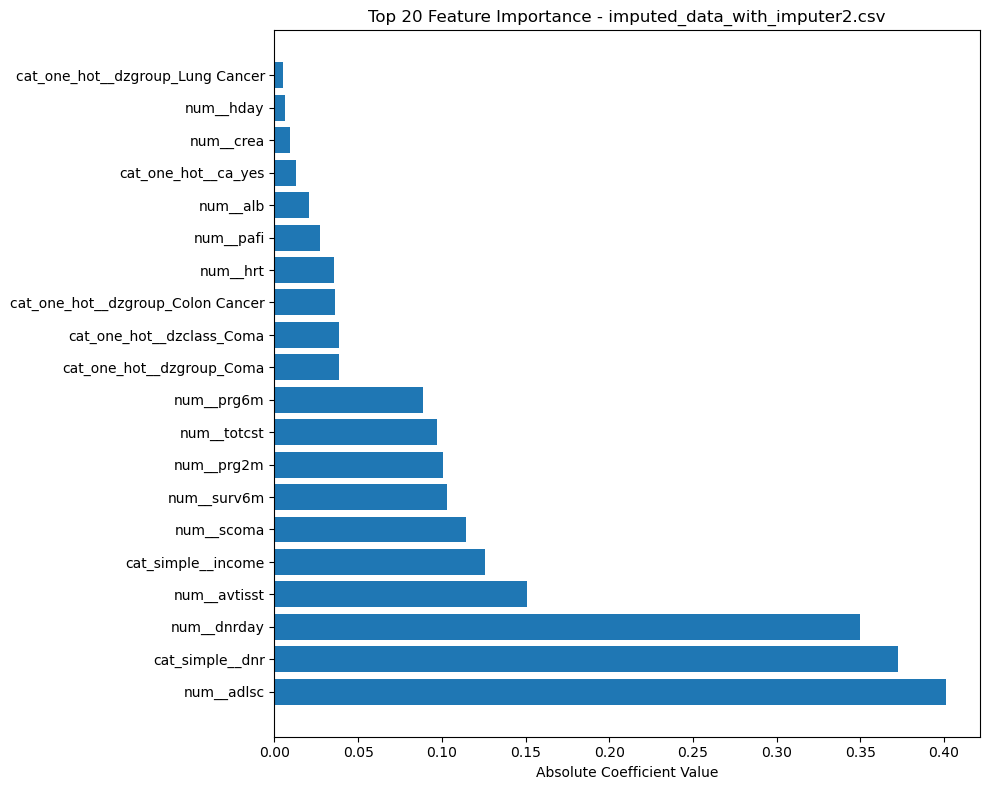


=== All Model Results (sorted by accuracy) ===
1. imputed_data_with_imputer2.csv: 0.7187 (Features: 23)
2. imputed_data_with_imputer10.csv: 0.7185 (Features: 22)
3. imputed_data_with_imputer0.csv: 0.7182 (Features: 39)
4. imputed_data_with_imputer9.csv: 0.7177 (Features: 38)
5. imputed_data_with_imputer8.csv: 0.7177 (Features: 39)
6. imputed_data_with_imputer1.csv: 0.7176 (Features: 38)
7. imputed_data_with_imputer11.csv: 0.7176 (Features: 31)
8. imputed_data_with_imputer3.csv: 0.7174 (Features: 30)
9. imputed_data_with_imputer15.csv: 0.7172 (Features: 36)
10. imputed_data_with_imputer7.csv: 0.7171 (Features: 33)
11. imputed_data_with_imputer6.csv: 0.7171 (Features: 35)
12. imputed_data_with_imputer12.csv: 0.7171 (Features: 25)
13. imputed_data_with_imputer4.csv: 0.7171 (Features: 29)
14. imputed_data_with_imputer14.csv: 0.7167 (Features: 36)
15. imputed_data_with_imputer13.csv: 0.7154 (Features: 20)
16. imputed_data_with_imputer5.csv: 0.7153 (Features: 20)


In [ ]:

# Function to process all datasets
def process_all_datasets(data_dir="../data/imputed_data/"):
    # Create directory if it doesn't exist
    os.makedirs(data_dir, exist_ok=True)
    
    results = []
    
    # Process each file in the directory
    for file_name in os.listdir(data_dir):
        if file_name.startswith("imputed_data_with_imputer") and file_name.endswith(".csv"):
            file_path = os.path.join(data_dir, file_name)
            result = apply_lasso_to_dataset(file_path)
            
            if result is not None:
                results.append(result)
    
    if not results:
        print("No results were generated. Check if apply_lasso_to_dataset is working correctly.")
        return [], None
    
    # Use 'cv_accuracy' for model comparison
    metric_key = 'cv_accuracy'
    print(f"Using '{metric_key}' for model comparison")
    
    # Find the best model (highest accuracy)
    best_result = max(results, key=lambda x: x[metric_key])
    
    print("\n=== Best Model Results ===")
    print(f"Dataset: {best_result['dataset']}")
    print(f"Optimal C: {best_result['optimal_C']:.6f}")
    print(f"CV Accuracy: {best_result['cv_accuracy']:.4f}")
    print(f"Number of selected features: {best_result['num_selected_features']}")
    print("\nTop 20 features by importance:")
    for feature, coef in best_result['sorted_features'][:20]:
        print(f"  {feature}: {coef:.6f}")
    
    # Plot feature importance for the best model
    plot_feature_importance(best_result)
    
    # Print all results sorted by accuracy
    print("\n=== All Model Results (sorted by accuracy) ===")
    sorted_results = sorted(results, key=lambda x: x[metric_key], reverse=True)
    for i, result in enumerate(sorted_results):
        print(f"{i+1}. {result['dataset']}: {result['cv_accuracy']:.4f} (Features: {result['num_selected_features']})")
    
    return results, best_result

# Call the function to process all datasets
results, best_result = process_all_datasets()

Impute test data

In [ ]:
#Load the test dataset and impute na by imputer with highest accuracy
test_data = pd.read_csv('../data/stratified_test.csv')
test_data.info()

# Data type conversion
# Convert age from float to integer
test_data['age'] = test_data['age'].astype(int)
# Convert to string first, then category
test_data['diabetes'] = test_data['diabetes'].astype(str).astype('category')
test_data['dementia'] = test_data['dementia'].astype(str).astype('category')

# Automatically detect column types in a data frame
importlib.reload(DataStats)
num_cols, cat_cols = DataStats.cols_categorize(test_data)

# some categorical columns should be encoded by simple encoding, not one-hot encoding
cat_sim_cols = ['income', 'dnr', 'sfdm2'] # need to be encoded by simple encoding
cat_oh_cols = list(set(cat_cols) - set(cat_sim_cols)) # one-hot encoding

# Create and fit the imputer on the training data first
# This is the key step that was missing
imputer_best = ColumnTransformer(
    [("num", num_imputer_2, num_cols),
     ("cat_one_hot", cat_oh_imputer_1, cat_oh_cols),
     ("cat_simple", cat_sim_imputer_1, cat_sim_cols)]
)

# Fit the imputer on the training data
data = pd.read_csv('../data/stratified_train.csv')
imputer_best.fit(data)

# Now transform the test data
test_data_imputed = imputer_best.transform(test_data)
test_data_imputed_df = pd.DataFrame(
    test_data_imputed, 
    columns=imputer_best.get_feature_names_out()
)

# Now apply encoding to the simple categorical columns AFTER imputation
cat_sim_mappings = DataStats.cat_sim_mappings

# The column names in the imputed dataframe will have prefixes
for original_col in cat_sim_cols:
    transformed_col = f"cat_simple__{original_col}"
    if transformed_col in test_data_imputed_df.columns:
        # Convert to string if needed to ensure mapping works correctly
        test_data_imputed_df[transformed_col] = test_data_imputed_df[transformed_col].astype(str)
        
        # Apply the mapping
        test_data_imputed_df[transformed_col] = test_data_imputed_df[transformed_col].map(cat_sim_mappings[original_col])
        
        print(f"After mapping, {transformed_col} has {test_data_imputed_df[transformed_col].nunique()} unique values.")
        print(f"{test_data_imputed_df[transformed_col].value_counts()}")

# Save the imputed test data
test_data_imputed_df.to_csv('../data/imputed_test/test_imputed_data_with_imputer2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1541 non-null   float64
 1   sex       1541 non-null   object 
 2   dzgroup   1541 non-null   object 
 3   dzclass   1541 non-null   object 
 4   num.co    1541 non-null   int64  
 5   edu       1335 non-null   float64
 6   income    1084 non-null   object 
 7   scoma     1541 non-null   float64
 8   charges   1516 non-null   float64
 9   totcst    1388 non-null   float64
 10  totmcst   967 non-null    float64
 11  avtisst   1528 non-null   float64
 12  race      1534 non-null   object 
 13  sps       1541 non-null   float64
 14  aps       1541 non-null   float64
 15  surv2m    1541 non-null   float64
 16  surv6m    1541 non-null   float64
 17  hday      1541 non-null   int64  
 18  diabetes  1541 non-null   int64  
 19  dementia  1541 non-null   int64  
 20  ca        1541 non-null   obje

Store the best imputer

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to save the best model and top features
def save_best_model_and_features(best_model_results, model_file_path, features_file_path):
    """
    Save the best LASSO model and the top features with their coefficients.
    """
    # Save the best model
    joblib.dump(best_model_results['model'], model_file_path)
    print(f"Best LASSO model saved to {model_file_path}")
    
    # Save the top features with coefficients
    pd.DataFrame(
        best_model_results['sorted_features'], 
        columns=['Feature', 'Coefficient']
    ).to_csv(features_file_path, index=False)
    print(f"Top features saved to {features_file_path}")

# Function to extract top features from best model results
def extract_top_features(best_model_results, n_features=14):
    """
    Extract the top n features based on the sorted feature importance from the LASSO results.
    """
    # Get the sorted features and their coefficients
    sorted_features = best_model_results['sorted_features']
    
    # Extract just the feature names (without coefficients) for the top n
    top_features = [feature[0] for feature in sorted_features[:n_features]]
        
    return top_features

# Function to trim datasets based on selected features and standardize
def trim_and_standardize_datasets(file_path, top_features, target_col='cat_simple__sfdm2', scaler=None, fit_scaler=False):
    """
    Trim datasets to include only the top features plus target variable, and standardize features.
    
    Parameters:
    - file_path: Path to the dataset
    - top_features: List of features to keep
    - target_col: Target column name
    - scaler: StandardScaler object (if None and fit_scaler is True, a new one will be created)
    - fit_scaler: Whether to fit the scaler on this data
    
    Returns:
    - trimmed_data: Standardized dataset
    - scaler: Fitted StandardScaler object
    """
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Add target variable to create the complete column list
    selected_columns = top_features + [target_col]
    
    # Subset the data
    trimmed_data = data[selected_columns]
    
    # Separate features and target
    X = trimmed_data[top_features]
    y = trimmed_data[target_col]
    
    # Create or use provided scaler
    if scaler is None and fit_scaler:
        scaler = StandardScaler()
    
    # Standardize features
    if fit_scaler:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)
    
    # Convert back to DataFrame with original column names
    X_scaled_df = pd.DataFrame(X_scaled, columns=top_features)
    
    # Add the target column back
    X_scaled_df[target_col] = y.values
    
    return X_scaled_df, scaler

# Assuming `best_result` contains the best model results from LASSO
# Define file paths
best_model_file = "../models/best_lasso_model.pkl"
top_features_file = "../models/top_features.csv"
scaler_file = "../models/standard_scaler.pkl"

# Save the best model and top features
save_best_model_and_features(best_result, best_model_file, top_features_file)

# Extract the top 14 features dynamically
top_14_features = extract_top_features(best_result, n_features=14)

# Prepare and standardize the training dataset
train_file_path = '../data/imputed_data/imputed_data_with_imputer2.csv'
train_data_prepared, scaler = trim_and_standardize_datasets(
    train_file_path, 
    top_14_features, 
    fit_scaler=True
)
print(f"Prepared training data shape: {train_data_prepared.shape}")

# Save the scaler for later use
joblib.dump(scaler, scaler_file)
print(f"StandardScaler saved to {scaler_file}")

# Save the prepared training data
train_data_prepared.to_csv('../data/prepared_data/prepared_train_data.csv', index=False)
print("Prepared training data saved successfully.")

# Prepare and standardize the test dataset using the same scaler
test_file_path = '../data/imputed_test/test_imputed_data_with_imputer2.csv'
test_data_prepared, _ = trim_and_standardize_datasets(
    test_file_path, 
    top_14_features, 
    scaler=scaler, 
    fit_scaler=False
)
print(f"Prepared test data shape: {test_data_prepared.shape}")

# Save the prepared test data
test_data_prepared.to_csv('../data/prepared_data/prepared_test_data.csv', index=False)
print("Prepared test data saved successfully.")


Best LASSO model saved to ../models/best_lasso_model.pkl
Top features saved to ../models/top_features.csv
Prepared training data shape: (6164, 15)
StandardScaler saved to ../models/standard_scaler.pkl
Prepared training data saved successfully.
Prepared test data shape: (1541, 15)
Prepared test data saved successfully.
